In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sra=pd.read_csv('sra_complete_runs.csv',low_memory=False)

In [3]:
df_sra['ReleaseDate'] = df_sra['ReleaseDate'].apply(lambda x : pd.to_datetime(str(x)))
df_sra['year'] = df_sra['ReleaseDate'].dt.year

In [4]:
df_sra_techniques = df_sra.groupby('year')['LibraryStrategy'].value_counts().reset_index(name='count')
print(df_sra_techniques)

       year      LibraryStrategy  count
0    2007.0                  WGS    234
1    2008.0                  WGS   5043
2    2008.0             ChIP-Seq    221
3    2008.0                  WXS    158
4    2008.0                  EST    124
..      ...                  ...    ...
315  2019.0            FAIRE-seq    146
316  2019.0  Synthetic-Long-Read    141
317  2019.0                 ChIP    105
318  2019.0              MRE-Seq     66
319  2019.0            FINISHING      3

[320 rows x 3 columns]


In [5]:
df_sra_techniques_max = df_sra.groupby("year").max()["LibraryStrategy"]
print (df_sra_techniques_max)

year
2007.0          WGS
2008.0          WXS
2009.0          WXS
2010.0          WXS
2011.0          WXS
2012.0    miRNA-Seq
2013.0    ncRNA-Seq
2014.0        other
2015.0    ncRNA-Seq
2016.0        other
2017.0        other
2018.0        other
2019.0        other
Name: LibraryStrategy, dtype: object


In [6]:
#df_sra_techniques.groupby(['year', 'LibraryStrategy']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))

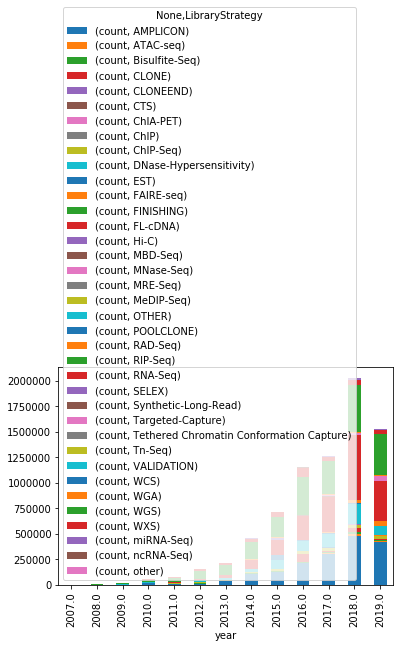

In [7]:
df_sra_techniques.pivot("year","LibraryStrategy").plot(kind="bar",stacked=True)